In [1]:
import networkx as nx
import itertools
from networkx.algorithms.shortest_paths.generic import has_path
import random

In [81]:
def addNode(G, node):
    i,j = node
    G.add_node(i+j*7)
    return G

def addPlayer(G, src, dest, player):
    i_src, j_src = src # nodo de origen (donde se hace el primer clic)
    i_dest, j_dest = dest # nodo de destino (donde se hace el segundo clic)
    src_pos = i_src*7+j_src # posición del origen en notación vectorial (no matricial)
    dest_pos = i_dest*7+j_dest # posición del destino en notación vectorial (no matricial)
    G.nodes[src_pos]['player'] = player # el nodo del origen se queda pintado en el color del player
    G.nodes[dest_pos]['player'] = 1 if player==2 else 2 # el nodo de destino se queda pintado en el color del rival
    G.remove_edge(src_pos, dest_pos, key = 'possible_movement') # se elimina la arista src_dest como posible mov.
    G = updatePlayers(G, src_pos, src, player)
    G.remove_edges_from([edge for edge in G.edges(dest_pos) if G.has_edge(*edge, key = 'possible_movement')])
    G = addEdges(G, *dest)
    return G

def addFirstPlayer(G, dest, player):
    i,j = dest
    G.nodes[i+j*7]['player'] = player
    G = addEdges(G, *dest)
    return G

def addEdges(G, i, j):
    possible_movements = {(i+1,j),(i-1,j),(i,j+1),(i,j-1),(i+1,j-1),(i-1,j+1)}
    possible_movements = [(i*7+j, movement[0]*7 + movement[1]) for movement in possible_movements
                          if (movement in [(i,j) for i in range(7) for j in range(7)] # si la posición existe en el tablero
                               and not G.nodes[movement[0]*7+movement[1]]['player'])] # si no hay fichas en esa casilla
    [G.add_edge(i,j, key = 'possible_movement') for (i,j) in possible_movements]
    return G

def updatePlayers(G, src_pos, src, player):
    '''
    Se actualizan las aristas (tienen la etiqueta de possible_movement si
    puede mover del nodo fuente al nodo destino y la etiqueta de path si
    forma un camino para uno de los jugadores).
    '''
    i,j = src
    possible_movements = {(i+1,j),(i-1,j),(i,j+1),(i,j-1),(i+1,j-1),(i-1,j+1)}
    possible_movements = [(i*7+j, movement[0]*7 + movement[1]) for movement in possible_movements
                          if (movement in [(i,j) for i in range(7) for j in range(7)] # si la posición existe en el tablero
                               and G.nodes[movement[0]*7+movement[1]]['player'] == player)]
    G.remove_edges_from([edge for edge in G.edges(src_pos) if not G.has_edge(*edge, key = 'possible_movement')])
    [G.add_edge(i,j, key = 'path') for (i,j) in possible_movements]
    return G

def checkWinner(G, player):
    '''
    Esta función devuelve un booleano para saber si el jugador ha
    ganado la partida.
    '''
    G = G.copy()
    G.remove_edges_from([edge for edge in G.edges if 'possible_movement' in edge])
    all_possible_paths = (list(itertools.product(range(7), range(41,49)))
                          + list(itertools.product(range(0,49,7), range(6,49,7))))
    return any([has_path(G, src, dest)
                for (src, dest) in all_possible_paths
                if (G.nodes[src]['player'] == player and G.nodes[src]['player'] == player)])

def getPossibleMovements(G, player):
    return [edge[:2] for edge in G.edges
            if G.nodes[edge[0]]['player'] == (1 if player==2 else 2)
               and 'possible_movement' in edge]

def nextBlackMovement(G):
    '''
    Esta función se encarga de implementar la lógica de la siguiente
    jugada del jugador negro.
    '''
    src, dest = random.choice(getPossibleMovements(G, player = 1))
    return (src//7, src%7), (dest//7, dest%7)

def getBoard(G):
    return [[G.nodes[i*7+j]['player'] for j in range(7)] for i in range(7)]

In [88]:
G = nx.MultiGraph()
G.add_nodes_from(range(49), player = 0)

In [89]:
G = addFirstPlayer(G, (1,1), 2)

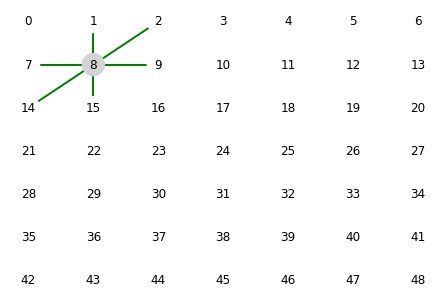

In [90]:
import matplotlib.pyplot as plt
import networkx as nx

pos = [(j,i) for i in range(6,-1,-1) for j in range(7)]
node_colours, edge_colours = [], []
for node in G.nodes:
    if not G.nodes[node]['player']: node_colours.append('white')
    elif G.nodes[node]['player'] == 1: node_colours.append('black')
    else: node_colours.append('lightgrey')

for edge in G.edges:
    if 'path' in edge: edge_colours.append('red')
    else: edge_colours.append('green')
        
nx.draw(G, pos, node_color=node_colours, edge_color = edge_colours, node_size=500, width = 2, with_labels=True)

plt.show()

In [100]:
(8,9) in getPossibleMovements(G, player = 1)

True

In [101]:
tuple([2,3])

(2, 3)